In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from datetime import datetime

In [2]:
statipy_df = pd.read_csv('statipy_results.csv')
statipy_df.head()

,Unnamed: 0,Track,Explicit,Tpopularity,Artist,Album,Rdate
0,0,Paradise,False,49,Voyage,Paradise,2018-02-14
1,1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24
2,2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03
3,3,Night,False,39,John Carpenter,Lost Themes,2015-02-03
4,4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17


In [19]:
statipy_df['Rdate'] = pd.to_datetime(statipy_df['Rdate'])

In [20]:
statipy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
Unnamed: 0     991 non-null int64
Track          991 non-null object
Explicit       991 non-null bool
Tpopularity    991 non-null int64
Artist         991 non-null object
Album          991 non-null object
Rdate          991 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(3)
memory usage: 47.5+ KB


In [21]:
rupaul_df = statipy_df[statipy_df['Artist'] == 'RuPaul']

In [6]:
rupaul_df.groupby(['Album', 'Track']).describe()

Tpopularity  \
                                                                                                            count   
Album                                              Track                                                            
American                                           Call Me Mother                                             2.0   
                                                   Charisma, Uniqueness, Nerve & Talent                       1.0   
                                                   Hey Doll                                                   1.0   
                                                   It Ain't Over                                              1.0   
                                                   Kitty Girl                                                 1.0   
                                                   Mighty Love (feat. Kummerspeck)                            1.0   
                                                   Spotlight                                                  1.0   
Born Naked                                         Adrenaline (feat. Myah Marie)                              3.0   
                                                   Born Naked (feat. Clairy Browne)                           1.0   
                                                   Can I Get an Amen (feat. Martha Wash)                      1.0   
                                                   Dance with U                                               2.0   
                                                   Fly Tonight (feat. Frankmusik)                             2.0   
                                                   Freaky Money (feat. Big Freedia)                           1.0   
                                                   Let the Music Play (feat. Michelle Visage)                 1.0   
                                                   Modern Love                                                1.0   
                                                   Sissy That Walk                                            2.0   
Butch Queen                                        U Wear It Well                                             2.0   
Butch Queen: Ru-Mixes                              Come Pay Me (feat. Vjuan Allure)                           1.0   
                                                   U Wear It Well (Original Instrumental)                     1.0   
Category Is (feat. The Cast of Rupaul's Drag Ra... Category Is (feat. The Cast of Rupaul's Drag Ra...         1.0   
Champion                                           Champion                                                   1.0   
                                                   Destiny Is Mine                                            1.0   
                                                   Devil Made Me Do It                                        1.0   
                                                   Let's Turn The Night                                       1.0   
                                                   Main Event                                                 1.0   
                                                   Never Go Home Again                                        1.0   
                                                   Theme From "Drag Race"                                     1.0   
                                                   Throw Ya Hands Up                                          1.0   
DRAG UP YOUR LIFE                                  DRAG UP YOUR LIFE                                          1.0   
Essential, Vol. 2                                  Can I Get An Amen (YLXR Remix)                             1.0   
...                                                                                                           ...   
                                                   The Realness (feat. Eric Kupper)                           1.0   
       

In [119]:
dateby_tracks = rupaul_df.groupby(['Rdate']).count()[['Track']]

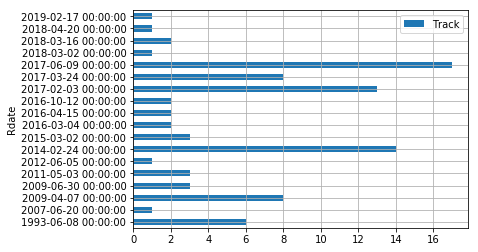

In [185]:
dateby_tracks.plot.barh(grid=True)

In [189]:
popby_dates = rupaul_df[rupaul_df['Tpopularity']>=43]

In [211]:
avgpop_date = popby_dates.groupby('Rdate').mean()[['Tpopularity']]

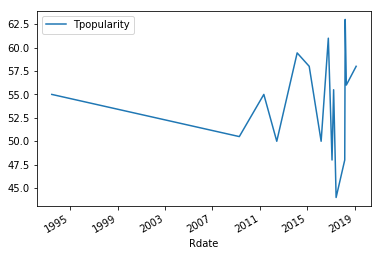

In [212]:
avgpop_date.plot()

In [260]:
explicit_ru = rupaul_df[rupaul_df['Explicit']==True]

In [281]:
explicit_ru.groupby('Rdate').mean()

,Unnamed: 0,Explicit,Tpopularity
Rdate,,,
2007-06-20,271.0,True,10.0
2016-10-12,122.5,True,61.0
2017-03-24,117.0,True,64.0


In [266]:
pg_ru = rupaul_df[rupaul_df['Explicit']==False]

In [283]:
pg_ru.groupby('Rdate').mean()

,Unnamed: 0,Explicit,Tpopularity
Rdate,,,
1993-06-08,249.166667,False,34.666667
2009-04-07,262.500000,False,36.750000
2009-06-30,269.000000,False,0.000000
2011-05-03,99.000000,False,55.000000
2012-06-05,122.000000,False,50.000000
2014-02-24,177.571429,False,48.500000
2015-03-02,169.333333,False,41.666667
2016-03-04,489.000000,False,50.000000
2016-04-15,249.000000,False,17.500000


In [213]:
avg_rating = popby_dates.groupby('Rdate').mean()[['Explicit']]

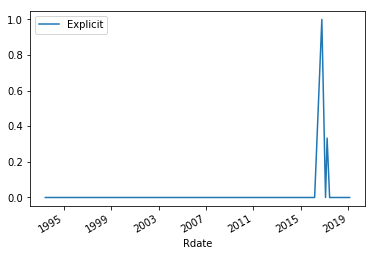

In [222]:
avg_rating.plot()

In [28]:
rupop = rupaul_discog[['Tpopularity']]

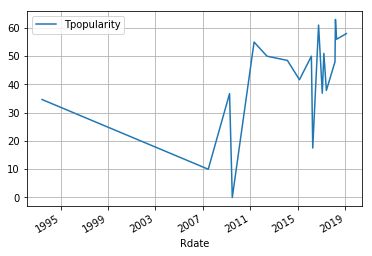

In [286]:
rupop.mean().plot.line(grid=True)

In [237]:
ru_once = rupaul_df.groupby('Track').filter(lambda x: x['Track'].count()==1)
ru1df = ru_once[['Track', 'Tpopularity', 'Rdate', 'Explicit']]

In [288]:
ru1df.groupby('Tpopularity').describe()

Explicit                               Rdate         \
               count unique    top freq first last count unique   
Tpopularity                                                       
0                  3      1  False    3   NaN  NaN     3      1   
10                 1      1   True    1   NaN  NaN     1      1   
15                 1      1  False    1   NaN  NaN     1      1   
20                 2      1  False    2   NaN  NaN     2      2   
24                 1      1  False    1   NaN  NaN     1      1   
26                 3      1  False    3   NaN  NaN     3      3   
27                 1      1  False    1   NaN  NaN     1      1   
28                 1      1  False    1   NaN  NaN     1      1   
29                 2      1  False    2   NaN  NaN     2      1   
30                 1      1  False    1   NaN  NaN     1      1   
31                 3      1  False    3   NaN  NaN     3      3   
32                 2      1  False    2   NaN  NaN     2      2   
33                 3      1  False    3   NaN  NaN     3      1   
34                 4      1  False    4   NaN  NaN     4      4   
36                 2      1  False    2   NaN  NaN     2      2   
37                 1      1  False    1   NaN  NaN     1      1   
38                 1      1  False    1   NaN  NaN     1      1   
40                 1      1  False    1   NaN  NaN     1      1   
41                 2      1  False    2   NaN  NaN     2      2   
43                 2      1  False    2   NaN  NaN     2      1   
44                 1      1  False    1   NaN  NaN     1      1   
46                 1      1  False    1   NaN  NaN     1      1   
47                 1      1  False    1   NaN  NaN     1      1   
48                 2      1  False    2   NaN  NaN     2      2   
49                 1      1  False    1   NaN  NaN     1      1   
50                 2      1  False    2   NaN  NaN     2      2   
52                 3      1  False    3   NaN  NaN     3      3   
53                 1      1  False    1   NaN  NaN     1      1   
54                 1      1  False    1   NaN  NaN     1      1   
56                 1      1  False    1   NaN  NaN     1      1   
58                 1      1  False    1   NaN  NaN     1      1   

                                                            \
                             top freq                first   
Tpopularity                                                  
0            2009-06-30 00:00:00    3  2009-06-30 00:00:00   
10           2007-06-20 00:00:00    1  2007-06-20 00:00:00   
15           2016-04-15 00:00:00    1  2016-04-15 00:00:00   
20           1993-06-08 00:00:00    1  1993-06-08 00:00:00   
24           1993-06-08 00:00:00    1  1993-06-08 00:00:00   
26           1993-06-08 00:00:00    1  1993-06-08 00:00:00   
27           2017-02-03 00:00:00    1  2017-02-03 00:00:00   
28           1993-06-08 00:00:00    1  1993-06-08 00:00:00   
29           2017-02-03 00:00:00    2  2017-02-03 00:00:00   
30           2009-04-07 00:00:00    1  2009-04-07 00:00:00   
31           2009-04-07 00:00:00    1  2009-04-07 00:00:00   
32           2017-06-09 00:00:00    1  2009-04-07 00:00:00   
33           2017-06-09 00:00:00    3  2017-06-09 00:00:00   
34           2017-03-24 00:00:00    1  2009-04-07 00:00:00   
36           2014-02-24 00:00:00    1  2014-02-24 00:00:00   
37           2014-02-24 00:00:00    1  2014-02-24 00:00:00   
38           2017-06-09 00:00:00    1  2017-06-09 00:00:00   
40           2009-04-07 00:00:00    1  2009-04-07 00:00:00   
41           2017-03-24 00:00:00    1  2015-03-02 00:00:00   
43           2017-06-09 00:00:00    2  2017-06-09 00:00:00   
44           2017-02-03 00:00:00    1  2017-02-03 00:00:00   
46           2017-03-24 00:00:00    1  2017-03-24 00:00:00   
47           2017-06-09 00:00:00    1  2017-06-09 00:00:00   
48           2017-02-03 00:00:00    1  2017-02-03 00:00:00   
49           2009-04-07 00:00:00    1  2009-04-07 00:00:00 

In [305]:
pop_df = rupaul_df.groupby('Tpopularity')

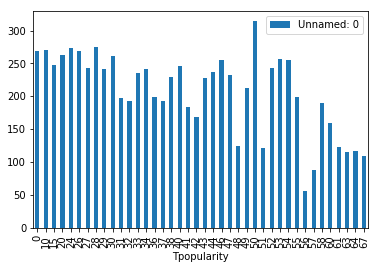

In [308]:
pop_df.mean().plot.bar()

In [321]:
ru_highpop = rupaul_df[rupaul_df['Tpopularity']>=50]
highpopdf = ru_highpop[['Track', 'Tpopularity', 'Rdate', 'Explicit']]

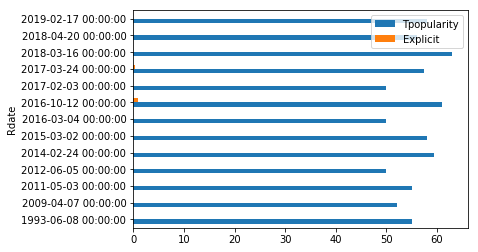

In [333]:
highpopdf.groupby('Rdate').mean().plot.barh()